In [1]:
from tools.basic.path_gen   import path_gen
from tools.step.pprint     import pprint

from models.direct.lammpshard.default          import default

import os

from models.direct.lammpsperiodic.RunLammps         import RunLammps


In [2]:
main_path = ["output"]

In [3]:
import numpy as np  
horario = np.arange(1,5,1)
antiho = np.arange(33,37,1)
merge = np.concatenate((horario,antiho),axis=0)
merge

array([ 1,  2,  3,  4, 33, 34, 35, 36])

In [4]:
all_bonds = []
horario = np.arange(1,5 + 4,1)      # 1->5
antiho  = np.arange(33,37 + 4,1)    # 33->37
merge = np.concatenate((horario,antiho),axis=0)

for i in merge:
    bonds = [ i + 8*j for j in range(4)]

    pairs = [ [bonds[j], bonds[j+1]] for j in range(len(bonds)-1)]
    pairs.append([bonds[-1], bonds[0]])
    all_bonds += pairs

In [5]:
all_bonds = np.array(all_bonds)

In [6]:
all_bonds

array([[ 1,  9],
       [ 9, 17],
       [17, 25],
       [25,  1],
       [ 2, 10],
       [10, 18],
       [18, 26],
       [26,  2],
       [ 3, 11],
       [11, 19],
       [19, 27],
       [27,  3],
       [ 4, 12],
       [12, 20],
       [20, 28],
       [28,  4],
       [ 5, 13],
       [13, 21],
       [21, 29],
       [29,  5],
       [ 6, 14],
       [14, 22],
       [22, 30],
       [30,  6],
       [ 7, 15],
       [15, 23],
       [23, 31],
       [31,  7],
       [ 8, 16],
       [16, 24],
       [24, 32],
       [32,  8],
       [33, 41],
       [41, 49],
       [49, 57],
       [57, 33],
       [34, 42],
       [42, 50],
       [50, 58],
       [58, 34],
       [35, 43],
       [43, 51],
       [51, 59],
       [59, 35],
       [36, 44],
       [44, 52],
       [52, 60],
       [60, 36],
       [37, 45],
       [45, 53],
       [53, 61],
       [61, 37],
       [38, 46],
       [46, 54],
       [54, 62],
       [62, 38],
       [39, 47],
       [47, 55],
       [55, 63

# Step 01. LAMMPS

In [7]:
# Initialize the parameters
params_lmp = default()
params_lmp["len_periodic"] = 1
params_lmp["only_small"] = True
params_lmp["Npoints"] = int(250*params_lmp["len_periodic"])
params_lmp["RUN_STEPS_DEFORM"] = 50000# 100000
params_lmp["RUN_STEPS_EQ"]     = 1
params_lmp["errate"]  = 0
params_lmp["nhilos"]  = 4
params_lmp["r_hilo"] = 15
params_lmp["h"] =50
params_lmp["r_hebra"]        =  0.135
params_lmp["th_hebra"] = -0.001
params_lmp["dist_factor"] = 0.2
params_lmp["r0_factor"] = 0.0005
params_lmp["yukawa"]["A"] = 30000
params_lmp["yukawa"]["kappa"] = 0.075
params_lmp["hilo_central"] = 10
params_lmp["Remesh"] = False
params_lmp["V0_bond"] = 80000 #38000
params_lmp["remove_final"] = False
params_lmp["OMP_NUM_THREADS"] = 4
params_lmp["mpi"] = True


In [8]:
params_lmp["theta"]  =  np.deg2rad(67)


In [9]:
params_lmp["factor"]

4

In [10]:
pprint(params_lmp)

settings_step       : 
	- has_children
	-has_parent
	-verbose
	-...
Npoints             : 250
hilo_central        : 10
theta               : 1.1693705988362009
factor              : 4
Remesh              : False
RUN_STEPS_EQ        : 1
RUN_STEPS_DEFORM    : 50000
errate              : 0
nhilos              : 4
dist_factor         : 0.2
r0_factor           : 0.0005
V0_bond             : 80000
r_hebra             : 0.135
r_hebra_offset      : 0.01
external_hilos      : False
recompute_dist      : False
recompute_factor    : 1
Npoints_density     : None
remove_final        : False
th_hebra            : -0.001
only_small          : True
len_periodic        : 1
yukawa              : 
	- A
	-kappa
	-cutoff
	-...
OMP_NUM_THREADS     : 4
mpi                 : True
mpi_np              : 4
r_hilo              : 15
h                   : 50


In [11]:
RunLammps(params_lmp,main_path)

mpiexec -n 4 "C:\Users\djoroya\AppData\Local\LAMMPS 64-bit 2Aug2023-MSMPI\bin\lmp.exe" -in in.lammps > out.lammps
Output file: c:\Users\djoroya\Documents\GitHub\YarnBraid-solo\simulations\2024-09-24__23-49-44__60395\out.lammps
[1, 5, 9, 13, 17, 21, 25, 29]
[2, 6, 10, 14, 18, 22, 26, 30]
[3, 7, 11, 15, 19, 23, 27, 31]
[4, 8, 12, 16, 20, 24, 28, 32]
[5, 9, 13, 17, 21, 25, 29, 1]
[6, 10, 14, 18, 22, 26, 30, 2]
[7, 11, 15, 19, 23, 27, 31, 3]
[8, 12, 16, 20, 24, 28, 32, 4]
[9, 13, 17, 21, 25, 29, 1, 5]
[10, 14, 18, 22, 26, 30, 2, 6]
[11, 15, 19, 23, 27, 31, 3, 7]
[12, 16, 20, 24, 28, 32, 4, 8]
[13, 17, 21, 25, 29, 1, 5, 9]
[14, 18, 22, 26, 30, 2, 6, 10]
[15, 19, 23, 27, 31, 3, 7, 11]
[16, 20, 24, 28, 32, 4, 8, 12]
[17, 21, 25, 29, 1, 5, 9, 13]
[18, 22, 26, 30, 2, 6, 10, 14]
[19, 23, 27, 31, 3, 7, 11, 15]
[20, 24, 28, 32, 4, 8, 12, 16]
[21, 25, 29, 1, 5, 9, 13, 17]
[22, 26, 30, 2, 6, 10, 14, 18]
[23, 27, 31, 3, 7, 11, 15, 19]
[24, 28, 32, 4, 8, 12, 16, 20]
[25, 29, 1, 5, 9, 13, 17, 21]
[26, 

In [12]:
%matplotlib ipympl
import numpy as np

In [13]:
df = params_lmp["df"]

In [14]:
trajs = [ df[df["type"]==i][["xu","yu","zu"]].values for i in np.unique(df["type"])]

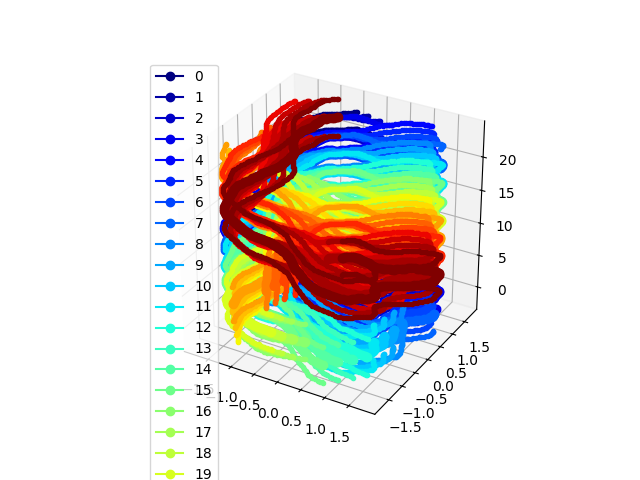

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ncolors = 32
colors = plt.cm.jet(np.linspace(0, 1, ncolors))
iter = -1
for traj in trajs[:32]:
    iter += 1
    ax.plot(traj[:,0],traj[:,1],traj[:,2],marker="o",color=colors[iter],label=str(iter))
    ax.plot(traj[:,0],traj[:,1],traj[:,2]+params_lmp["h"]/8,marker=".",color=colors[iter])
    ax.plot(traj[:,0],traj[:,1],traj[:,2]-params_lmp["h"]/8,marker=".",color=colors[iter])
    
# legend
ax.legend()
# Set aspect of the 3D plot to be equal
ax.set_box_aspect([1,1,1])

In [16]:
%matplotlib inline

-1.7014964942040791


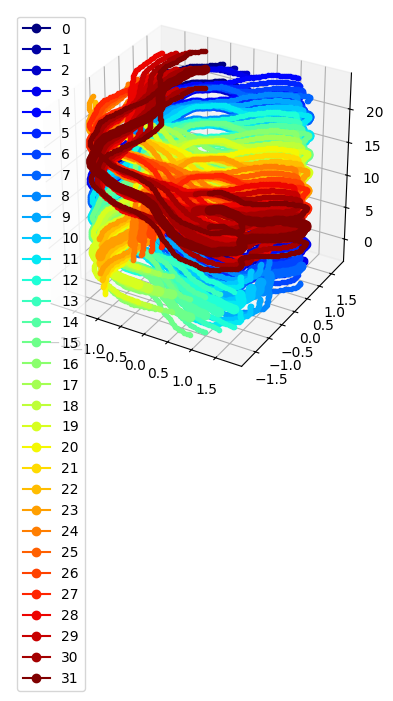

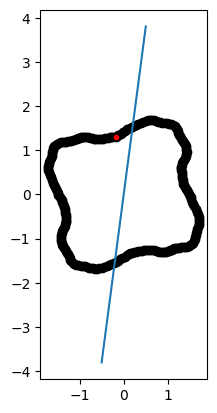

In [17]:
traj_1 = trajs[0]
# plot y = m*x 
# m = tan(theta)
# theta = 2pi/8
x = np.linspace(-0.5,0.5,100)
theta = -np.arctan2(traj_1[0,1],traj_1[0,0])
print(theta)
y = np.tan(theta)*x

fig = plt.figure()
plt.plot(traj_1[:,0],traj_1[:,1],marker="o",color="black")
plt.plot(traj_1[0,0],traj_1[0,1],marker=".",color="red")
plt.plot(x,y)
# aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
# x <-> y
# rotate theta all traj
for traj in trajs:
    x = traj[:,0].copy()
    y = traj[:,1].copy()
    traj[:,0] = x*np.cos(theta) - y*np.sin(theta)
    traj[:,1] = x*np.sin(theta) + y*np.cos(theta)

4.2494472333563486e-17


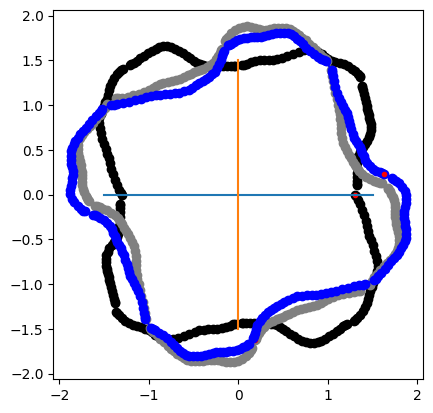

No such comm: fd5f541dd7344cb9b3098397e3148952


No such comm: 1551a152a18c49acb74a45b0f2cbd131


In [118]:
traj_1 = trajs[0]
traj_32= trajs[32]

theta_32 = -np.pi/2 - 0.025# np.arctan2(traj_32[0,1],traj_32[0,0])
traj_32_rot = traj_32.copy()
traj_32_rot[:,0] = traj_32[:,0]*np.cos(theta-theta_32) - traj_32[:,1]*np.sin(theta-theta_32)
traj_32_rot[:,1] = traj_32[:,0]*np.sin(theta-theta_32) + traj_32[:,1]*np.cos(theta-theta_32)
# plot y = m*x 
# m = tan(theta)
# theta = 2pi/8

x = np.linspace(-1.5,1.5,100)
theta = np.arctan2(traj_1[0,1],traj_1[0,0])
print(theta)
y = np.tan(theta)*x

fig = plt.figure()
plt.plot(traj_1[:,0],traj_1[:,1],marker="o",color="black")
plt.plot(traj_1[0,0],traj_1[0,1],marker=".",color="red")
plt.plot(traj_32[:,0],traj_32[:,1],marker="o",color="grey")
plt.plot(traj_32[0,0],traj_32[0,1],marker=".",color="red")
plt.plot(traj_32_rot[:,0],traj_32_rot[:,1],marker="o",color="blue")
plt.plot(traj_32_rot[0,0],traj_32_rot[0,1],marker=".",color="red")
plt.plot(x,y)
plt.plot(y,-x)

theta_32 = np.arctan2(traj_32[0,1],traj_32[0,0])
# print(theta_32*180/np.pi)
# aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
# x <-> y
# rotate theta all traj


In [94]:
theta = [ np.arctan2(itraj[0,1],itraj[0,0]) for itraj in trajs]


In [95]:

theta

[4.2494472333563486e-17,
 -0.19955280298204403,
 -0.3943218216432927,
 -0.5814906359289496,
 -0.8750122695012695,
 -1.0185374930856301,
 -1.1570121105565836,
 -1.2897345729452383,
 -1.5997987855622382,
 -1.7870197123603333,
 -1.9808429225626953,
 -2.1788636535289863,
 -2.4187677616141965,
 -2.566260625847992,
 -2.712459326988216,
 -2.850860138683426,
 -3.1403967446185055,
 2.9422329841332178,
 2.7469314777301284,
 2.5593587407725438,
 2.266586567289135,
 2.1233046347909292,
 1.9843669793287624,
 1.8517214291797095,
 1.5423518272436696,
 1.3570579675725112,
 1.1617495871579584,
 0.9612932632743736,
 0.7224233459991565,
 0.5748044676314343,
 0.42904528746579274,
 0.29077125474459165,
 -1.455026196004951,
 -1.2996196706911576,
 -1.1300024155870996,
 -0.9522600224145908,
 -0.6038602710888604,
 -0.456796053117835,
 -0.3083622123800932,
 -0.16785060748017921,
 0.07832977027745702,
 0.2456366959490902,
 0.4241864846652256,
 0.6007442678399139,
 0.9859127784513577,
 1.1334792797123576,
 1.2843

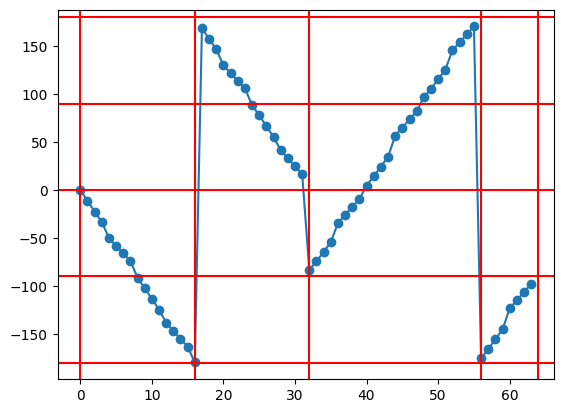

In [102]:
theta = np.array(theta)
plt.plot(theta*180/np.pi,marker="o")
# line in 90 
plt.axhline(y=90, color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=-90, color='r', linestyle='-')
plt.axhline(y=-180, color='r', linestyle='-')
plt.axhline(y=180, color='r', linestyle='-')

plt.axvline(x=0, color='r', linestyle='-')
plt.axvline(x=32, color='r', linestyle='-')
plt.axvline(x=16, color='r', linestyle='-')
plt.axvline(x=64, color='r', linestyle='-')
plt.axvline(x=48+8, color='r', linestyle='-')

(-20.0, 20.0)

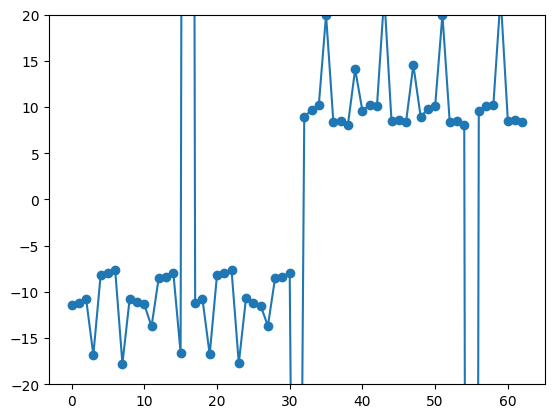

In [98]:
plt.plot((np.diff(theta))*180/np.pi,marker="o")
plt.ylim(-20,20)

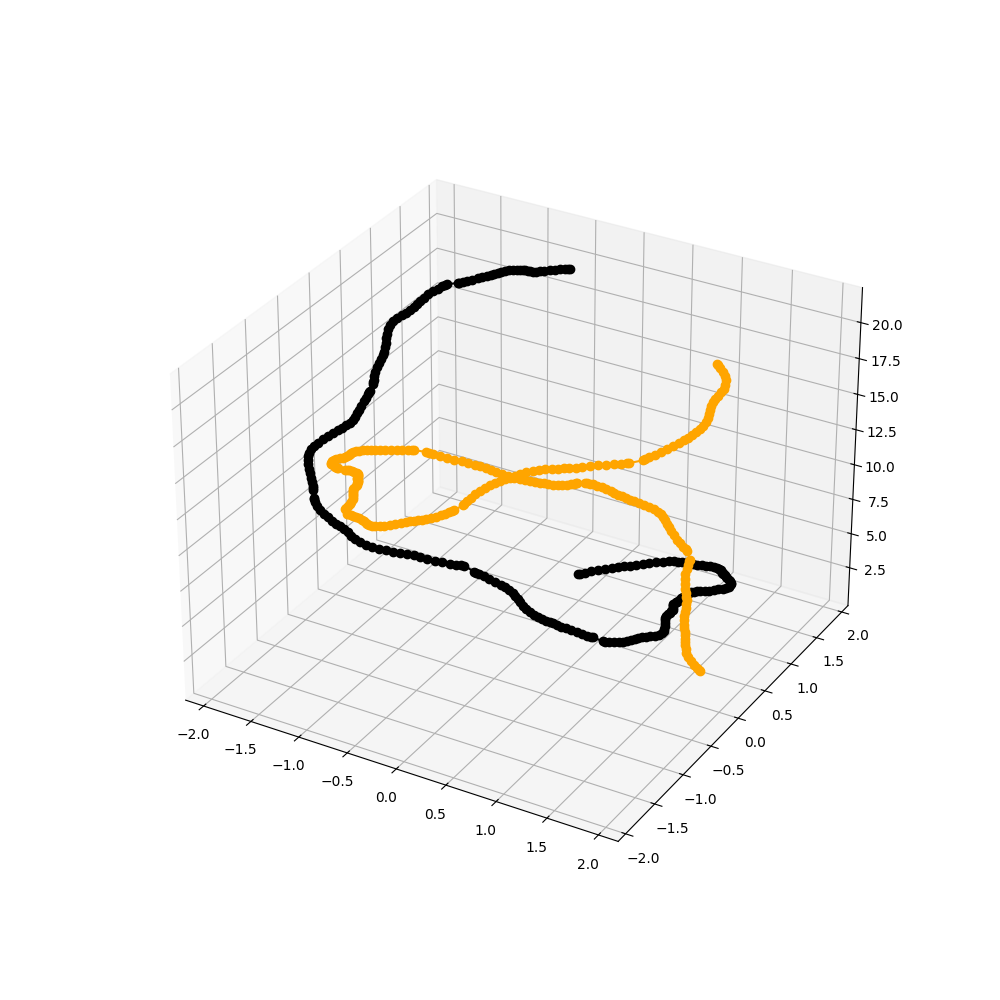

In [17]:
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.plot(traj_1[:,0],traj_1[:,1],traj_1[:,2],marker="o",color="black")
# plt.plot(traj_5[:,0],traj_5[:,1],traj_5[:,2],marker="o",color="blue")
# plt.plot(traj_9[:,0],traj_9[:,1],traj_9[:,2],marker="o",color="green")
plt.plot(traj_33[:,0],traj_33[:,1],traj_33[:,2],marker="o",color="orange")
# plt.plot(traj_5_rot[:,0],traj_5_rot[:,1],traj_5_rot[:,2],marker="o",color="red")

IndexError: index 32 is out of bounds for axis 0 with size 32

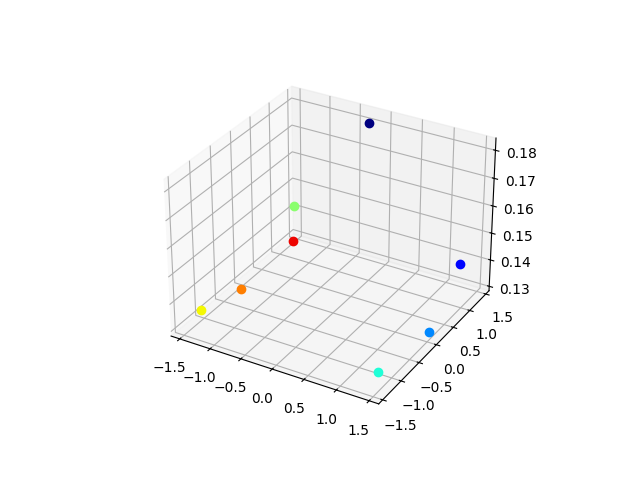

In [29]:
init_points = [ itraj[0] for itraj in trajs]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in np.arange(0,64,4):
    ax.plot([init_points[i][0]],[init_points[i][1]],[init_points[i][2]],marker="o",color=colors[i])

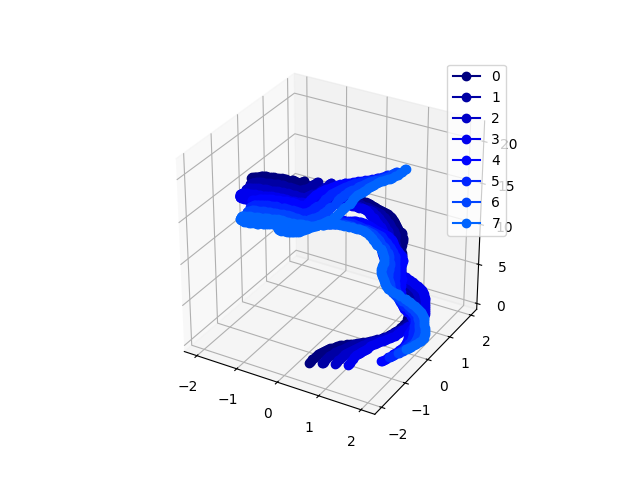

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ncolors = 32
colors = plt.cm.jet(np.linspace(0, 1, ncolors))
iter = -1
for traj in trajs[56:64]:
    iter += 1
    ax.plot(traj[:,0],traj[:,1],traj[:,2],marker="o",color=colors[iter],label=str(iter))

    
# legend
ax.legend()
# Set aspect of the 3D plot to be equal
ax.set_box_aspect([1,1,1])

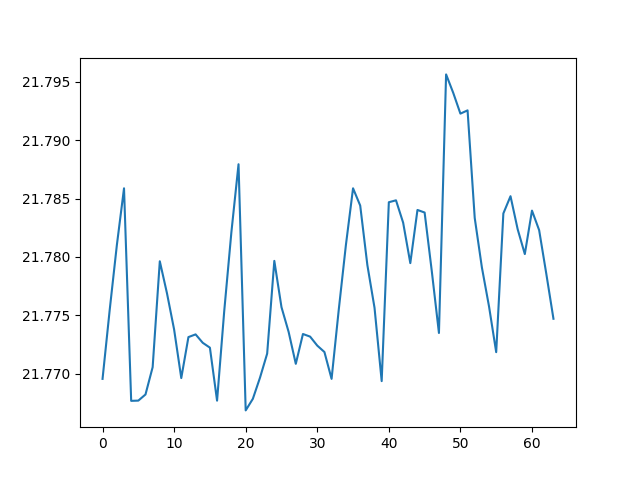

In [17]:
traj_dist = [ np.linalg.norm(traj[0]-traj[-1]) for traj in trajs]
fig = plt.figure()
plt.plot(traj_dist)